In [11]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/920.8 kB 435.7 kB/s eta 0:00:03
   - ------------------------------------- 30.7/920.8 kB 435.7 kB/s eta 0:00:03
   --- ----------------------------------- 92.2/920.8 kB 655.4 kB/s eta 0:00:02
   ---- --------------------------------- 112.6/920.8 kB 656.4 kB/s eta 0:00:02
   ---- --------------------------------- 112.6/920.8 kB 656.4 kB/s eta 0:00:02
   --------- ---------------------------- 235.5/920.8 kB 901.1 kB/s eta 0:00:01
   ---------- --------------------------- 245.8/920.8 kB 754.9 kB/s eta 0:00:01
   ------------- ------------------------ 327.7/920.8 kB 846.5 kB/s eta 0:00:01
   ---------------- --------------------- 399.4/920.8 kB 922.1 kB/s eta 0:00:01
   ----------------- -------------------- 430.1/920.8 kB 960.7 kB/s eta 0:00:01
   ----------------------- ---------------- 532.5/920.8 k

Final score (fuzzy result): 5.0


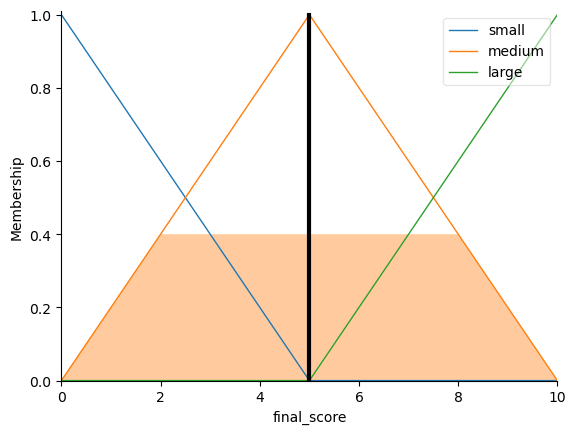

In [13]:
 # Suppose there are 3 disease detection systems:
 # • Diabetes system generates a score d.
 # • Heart Disease system generates a score h.
 # • Thyroid Disease system generates a score t.
 # 1. Use a Fuzzy Inference System with (small, medium, large) or (low, moderate, high)
 # to derive a final score by combining the scores.
 # 2. Build a fuzzy fusion system for this purpose

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Step 1: Use matplotlib inline for Jupyter notebooks to display plots
%matplotlib inline

# Step 2: Define the fuzzy variables (inputs and output)
diabetes_score = ctrl.Antecedent(np.arange(0, 11, 1), 'diabetes_score')
heart_disease_score = ctrl.Antecedent(np.arange(0, 11, 1), 'heart_disease_score')
thyroid_score = ctrl.Antecedent(np.arange(0, 11, 1), 'thyroid_score')
final_score = ctrl.Consequent(np.arange(0, 11, 1), 'final_score')

# Step 3: Define fuzzy membership functions
# For diabetes_score, heart_disease_score, and thyroid_score
diabetes_score['low'] = fuzz.trimf(diabetes_score.universe, [0, 0, 5])
diabetes_score['moderate'] = fuzz.trimf(diabetes_score.universe, [0, 5, 10])
diabetes_score['high'] = fuzz.trimf(diabetes_score.universe, [5, 10, 10])

heart_disease_score['low'] = fuzz.trimf(heart_disease_score.universe, [0, 0, 5])
heart_disease_score['moderate'] = fuzz.trimf(heart_disease_score.universe, [0, 5, 10])
heart_disease_score['high'] = fuzz.trimf(heart_disease_score.universe, [5, 10, 10])

thyroid_score['low'] = fuzz.trimf(thyroid_score.universe, [0, 0, 5])
thyroid_score['moderate'] = fuzz.trimf(thyroid_score.universe, [0, 5, 10])
thyroid_score['high'] = fuzz.trimf(thyroid_score.universe, [5, 10, 10])

# For final_score
final_score['small'] = fuzz.trimf(final_score.universe, [0, 0, 5])
final_score['medium'] = fuzz.trimf(final_score.universe, [0, 5, 10])
final_score['large'] = fuzz.trimf(final_score.universe, [5, 10, 10])

# Step 4: Define fuzzy rules
rule1 = ctrl.Rule(diabetes_score['low'] & heart_disease_score['low'] & thyroid_score['low'], final_score['small'])
rule2 = ctrl.Rule(diabetes_score['moderate'] & heart_disease_score['moderate'] & thyroid_score['moderate'], final_score['medium'])
rule3 = ctrl.Rule(diabetes_score['high'] & heart_disease_score['high'] & thyroid_score['high'], final_score['large'])
rule4 = ctrl.Rule(diabetes_score['low'] & heart_disease_score['moderate'] & thyroid_score['high'], final_score['medium'])
rule5 = ctrl.Rule(diabetes_score['high'] & heart_disease_score['low'] & thyroid_score['moderate'], final_score['medium'])

# Step 5: Create control system and simulation
disease_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
disease_fusion = ctrl.ControlSystemSimulation(disease_ctrl)

# Step 6: Input scores for each disease system
disease_fusion.input['diabetes_score'] = 7  # Example: Diabetes score = 7
disease_fusion.input['heart_disease_score'] = 5  # Example: Heart Disease score = 5
disease_fusion.input['thyroid_score'] = 8  # Example: Thyroid score = 8

# Step 7: Compute the final fuzzy output
disease_fusion.compute()

# Output the final score
print(f"Final score (fuzzy result): {disease_fusion.output['final_score']}")

# Step 8: Display and save the plot
final_score.view(sim=disease_fusion)
#plt.savefig('fuzzy_plot.png')  # Save the plot as an image


